In [29]:
#imported a shit ton of modules didnt know which packages I wanted to use for viz.
import pandas as pd
import matplotlib.pyplot
import re
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from sklearn.linear_model import LinearRegression
from adjustText import adjust_text
import numpy as np

In [21]:
#manually copied table from understat.com
df = pd.read_csv('/Users/calvi/Downloads/under_stat_data.csv')

In [22]:
df

,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS
0,Arsenal,15,11,3,1,33,14,36,30.77-2.23,14.31+0.31,29.49-6.51
1,Liverpool,15,10,4,1,34,14,34,33.63-0.37,19.72+5.72,29.12-4.88
2,Manchester City,14,9,3,2,36,16,30,32.61-3.39,12.47-3.53,30.96+0.96
3,Aston Villa,14,9,2,3,33,20,29,28.26-4.74,21.34+1.34,24.45-4.55
4,Tottenham,14,8,3,3,28,20,27,24.26-3.74,24.19+4.19,20.79-6.21
5,Newcastle United,14,8,2,4,32,14,26,31.31-0.69,14.50+0.50,28.81+2.81
6,Brighton,15,7,4,4,32,27,25,25.69-6.31,23.25-3.75,21.94-3.06
7,Manchester United,14,8,0,6,16,17,24,20.93+4.93,25.17+8.17,17.51-6.49
8,West Ham,14,6,3,5,24,24,21,21.55-2.45,26.46+2.46,16.78-4.22
9,Chelsea,14,5,4,5,25,22,19,29.39+4.39,19.63-2.37,25.34+6.34


In [23]:
#clearing everything uneccessary for xGA xG after +-
def clean_numeric(s):
    return re.sub(r'([+-]?\d+\.\d+)([+-]?\d+\.\d+)?(?=[+-]|\b)', lambda x: x.group(1), s)
columns_to_clean = ['xG', 'xGA', 'xPTS']
df[columns_to_clean] = df[columns_to_clean].apply(lambda x: x.map(clean_numeric))
print(df)

                       Team   M   W  D   L   G  GA  PTS     xG    xGA   xPTS
0                   Arsenal  15  11  3   1  33  14   36  30.77  14.31  29.49
1                 Liverpool  15  10  4   1  34  14   34  33.63  19.72  29.12
2           Manchester City  14   9  3   2  36  16   30  32.61  12.47  30.96
3               Aston Villa  14   9  2   3  33  20   29  28.26  21.34  24.45
4                 Tottenham  14   8  3   3  28  20   27  24.26  24.19  20.79
5          Newcastle United  14   8  2   4  32  14   26  31.31  14.50  28.81
6                  Brighton  15   7  4   4  32  27   25  25.69  23.25  21.94
7         Manchester United  14   8  0   6  16  17   24  20.93  25.17  17.51
8                  West Ham  14   6  3   5  24  24   21  21.55  26.46  16.78
9                   Chelsea  14   5  4   5  25  22   19  29.39  19.63  25.34
10                Brentford  15   5  4   6  23  21   19  29.45  20.46  25.16
11                   Fulham  15   5  3   7  21  26   18  19.98  26.40  16.97

In [ ]:
#since I copied it manually had to fix errors in code
df['xGA'] = pd.to_numeric(df['xGA'], errors='coerce')
df['xG'] = pd.to_numeric(df['xG'], errors='coerce')

In [26]:
#made xG Ratios and xGA Ratios
df['xG Ratio'] = df['G'] / df['xG']
df['xGA Ratio'] = df['GA'] / df['xGA']

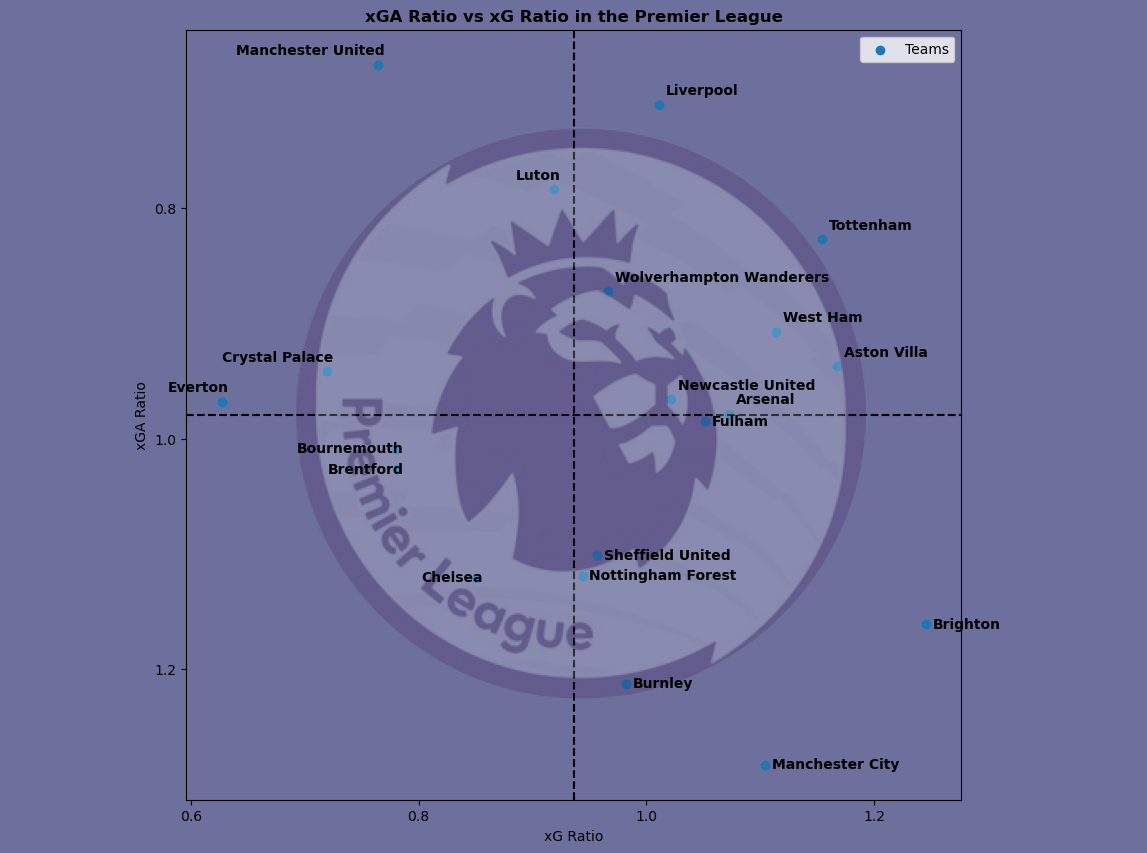

In [68]:
fig, ax = plt.subplots(figsize=(10, 10))
fig.set_facecolor('#6d6f9d')
ax.patch.set_facecolor('#6d6f9d')

X = df[['xG Ratio']]
y = df['xGA Ratio']

x_increment = 0.2
y_increment = 0.2

plt.xticks([0.6, 0.8, 1.0, 1.2, 1.4])
plt.yticks([0.6, 0.8, 1.0, 1.2, 1.4])
#invert to show negative impact for xGA
plt.gca().invert_yaxis()

#added logo 
logo_path = '/Users/calvi/Downloads/Prem_Logo-removebg-preview.png'  # Replace with the path to your logo image
logo = plt.imread(logo_path)
imagebox = OffsetImage(logo, zoom=1.2, alpha=0.2)
ab = AnnotationBbox(imagebox, (0.5, 0.5), xycoords='axes fraction', boxcoords="axes fraction", frameon=False)
ax.add_artist(ab)

scatter = plt.scatter(X, y, marker='o', label='Teams')

# Draw vertical and horizontal lines at the midpoints for 4 quadrants
x_midpoint = (plt.xlim()[0] + plt.xlim()[1]) / 2
y_midpoint = (plt.ylim()[0] + plt.ylim()[1]) / 2
plt.axvline(x_midpoint, color='black', linestyle='--')
plt.axhline(y_midpoint, color='black', linestyle='--')

# edit each point with the team name and adjust based on the quadrant
for i, txt in enumerate(df['Team']):
    x_coord, y_coord = X.iloc[i].item(), y.iloc[i].item()  # Use .item() to extract scalar values
    ha = 'right' if x_coord < x_midpoint else 'left'
    va = 'top' if y_coord > y_midpoint else 'bottom'
    plt.annotate(txt, (x_coord, y_coord), textcoords="offset points", xytext=(5, 5), ha=ha, va=va, c='black', weight='bold')
#title everything
plt.xlabel('xG Ratio')
plt.ylabel('xGA Ratio')
plt.title('xGA Ratio vs xG Ratio in the Premier League', weight='bold')
plt.legend()
plt.show()

In [69]:
!git clone https://github.com/Calvinzheng123/Charlotte-Mens-Soccer.git

fatal: destination path 'Charlotte-Mens-Soccer' already exists and is not an empty directory.
